In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

DATASET_PATH = "datasets/"

def load_song_data(dataset_path=DATASET_PATH):
    df = pd.read_csv(dataset_path + 'year-prediction-msd-train.txt', sep=",", header=None)
    return df

In [2]:
songs = load_song_data()

In [3]:
#songs.hist(bins=100, figsize=(40,35))
#plt.show()

In [4]:
songs_x = songs.iloc[:,1:20]
songs_y = songs.iloc[:,0]
#songs_x = songs_x.values.reshape(-1,1)
songs_y = songs_y.values.reshape(-1,1)

In [5]:
#Normalizing
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])
songs_x_prepared = num_pipeline.fit_transform(songs_x)

In [6]:
# Pegando os primeiros 20868 exemplos pra teste
songs_x_train, songs_x_test, songs_y_train, songs_y_test = train_test_split(songs_x_prepared, songs_y, test_size=0.045, random_state=0)

In [7]:
# Train the model using the training sets
regr = linear_model.LinearRegression()
regr.fit(songs_x_train, songs_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
# Make predictions using the testing set
songs_y_pred = regr.predict(songs_x_test)

In [9]:
# The coefficients
print('Estimated intercept: ', regr.intercept_)

# The coefficients
print('Coefficients: ', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(songs_y_test, songs_y_pred))

Estimated intercept:  [ 1998.39012869]
Coefficients:  [[ 5.43430428 -2.61921855 -1.64541414  0.64148291 -0.05548199 -2.98153349
  -0.35269866 -0.64166195 -1.14176498  0.73777174 -0.93997645  0.06082005
   0.74735776  0.90253904 -0.33694974  1.20973869  0.4681896   0.73093177
   0.6230593 ]]
Mean squared error: 97.76


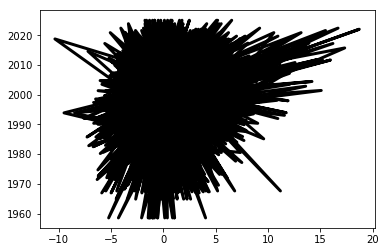

In [10]:
# Plot outputs
#plt.scatter(songs_x_train[:,2], songs_y_train,  color='pink')
#plt.scatter(songs_x_test[:,2], songs_y_test,  color='blue')
plt.plot(songs_x_test, songs_y_pred, color='black', linewidth=3)

plt.show()
